In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загружаем данные и делим их на тренировочные и тестовые
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Логистическая регрессия
model_lr = LogisticRegression(max_iter=200).fit(X_train, y_train)
print("Логистическая регрессия - Точность:", accuracy_score(y_test, model_lr.predict(X_test)))

# Метод K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print("K-Nearest Neighbors - Точность:", accuracy_score(y_test, model_knn.predict(X_test)))


Логистическая регрессия - Точность: 1.0
K-Nearest Neighbors - Точность: 1.0


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Создаём и визуализируем матрицу ошибок для Логистической Регрессии
y_pred_lr = model_lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

# Печатаем отчёт о классификации
print(classification_report(y_test, y_pred_lr))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



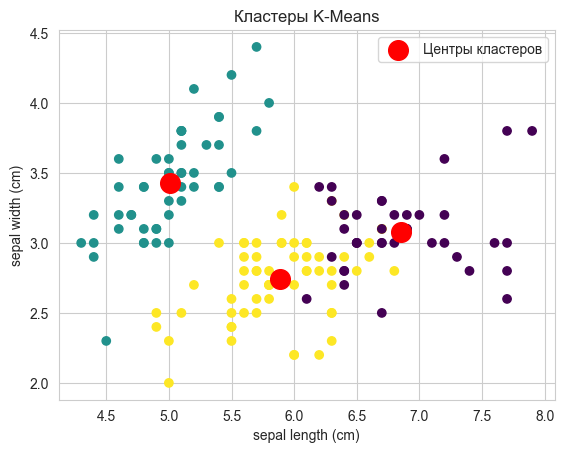

In [9]:
from sklearn.cluster import KMeans

# Загружаем данные и применяем K-Means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42).fit(data.data)
clusters = kmeans.predict(data.data)

# Визуализация кластеров
plt.scatter(data.data[:, 0], data.data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Центры кластеров')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Кластеры K-Means")
plt.legend()
plt.show()


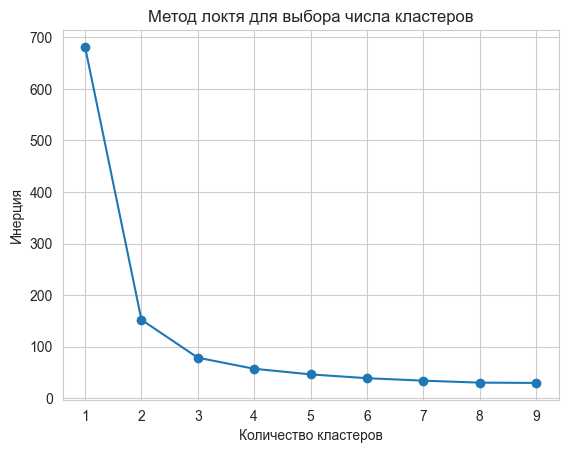

In [10]:
# Проверяем качество кластеризации для разного количества кластеров
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data.data)
    inertia.append(kmeans.inertia_)

# График метода локтя
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Количество кластеров")
plt.ylabel("Инерция")
plt.title("Метод локтя для выбора числа кластеров")
plt.show()

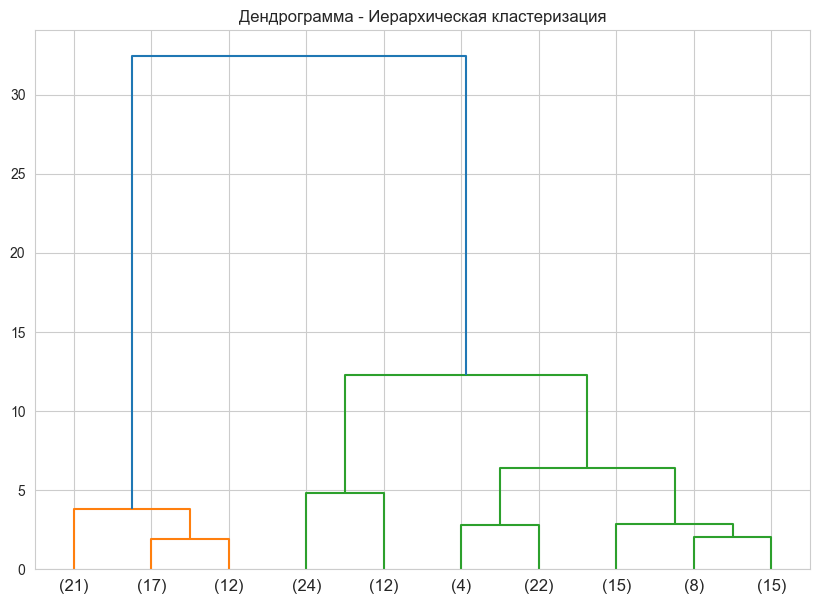

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Иерархическая кластеризация и дендрограмма
linked = linkage(data.data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Дендрограмма - Иерархическая кластеризация")
plt.show()


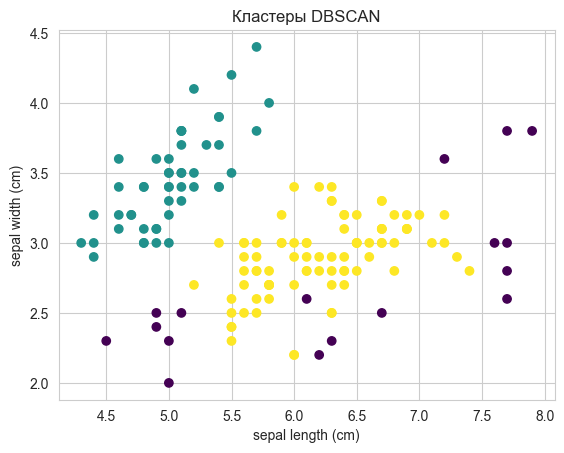

In [12]:
from sklearn.cluster import DBSCAN

# Применяем DBSCAN и визуализируем результаты
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data.data)
clusters_dbscan = dbscan.labels_

plt.scatter(data.data[:, 0], data.data[:, 1], c=clusters_dbscan, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Кластеры DBSCAN")
plt.show()
